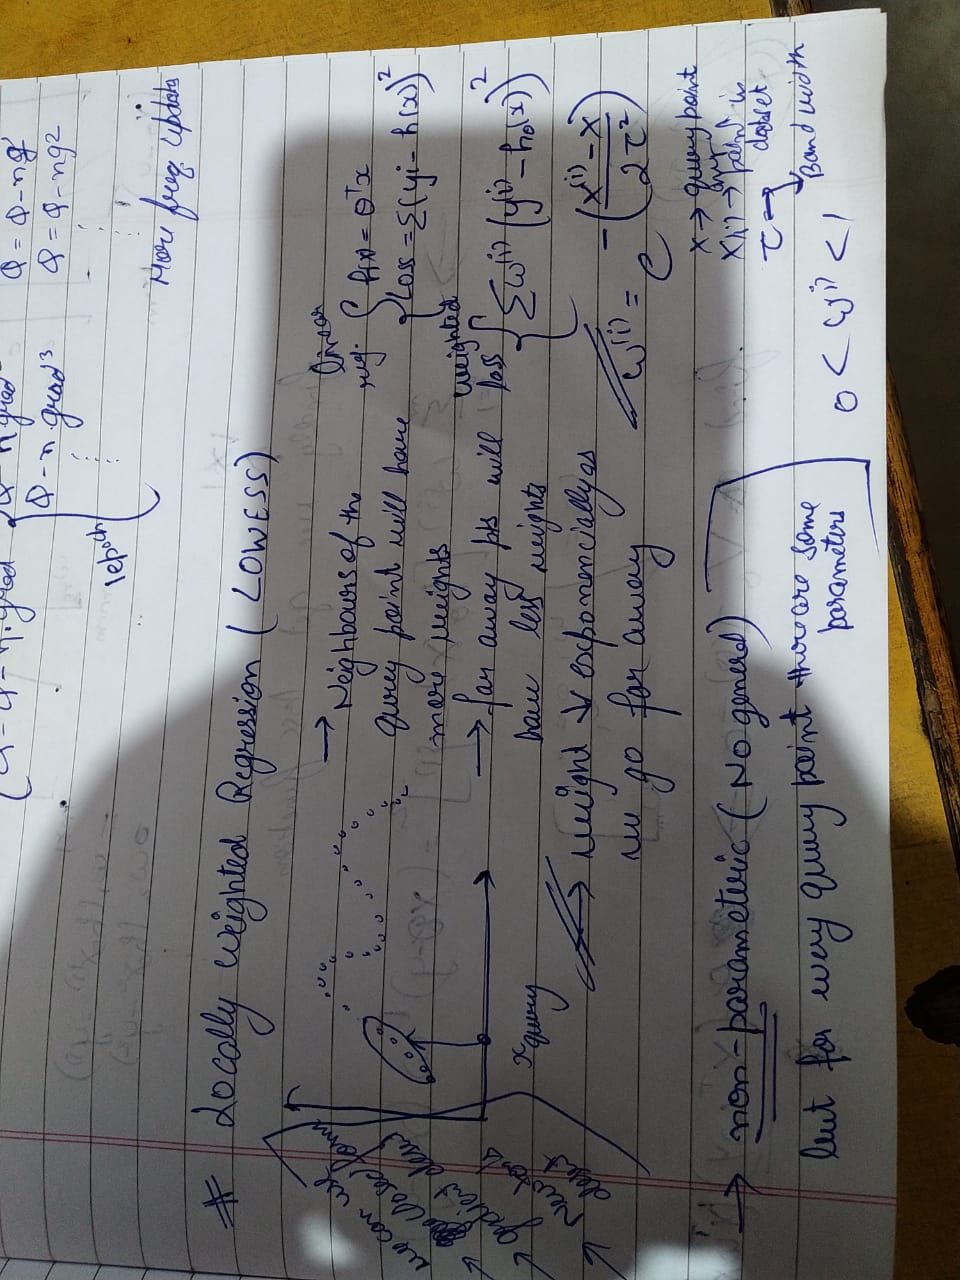

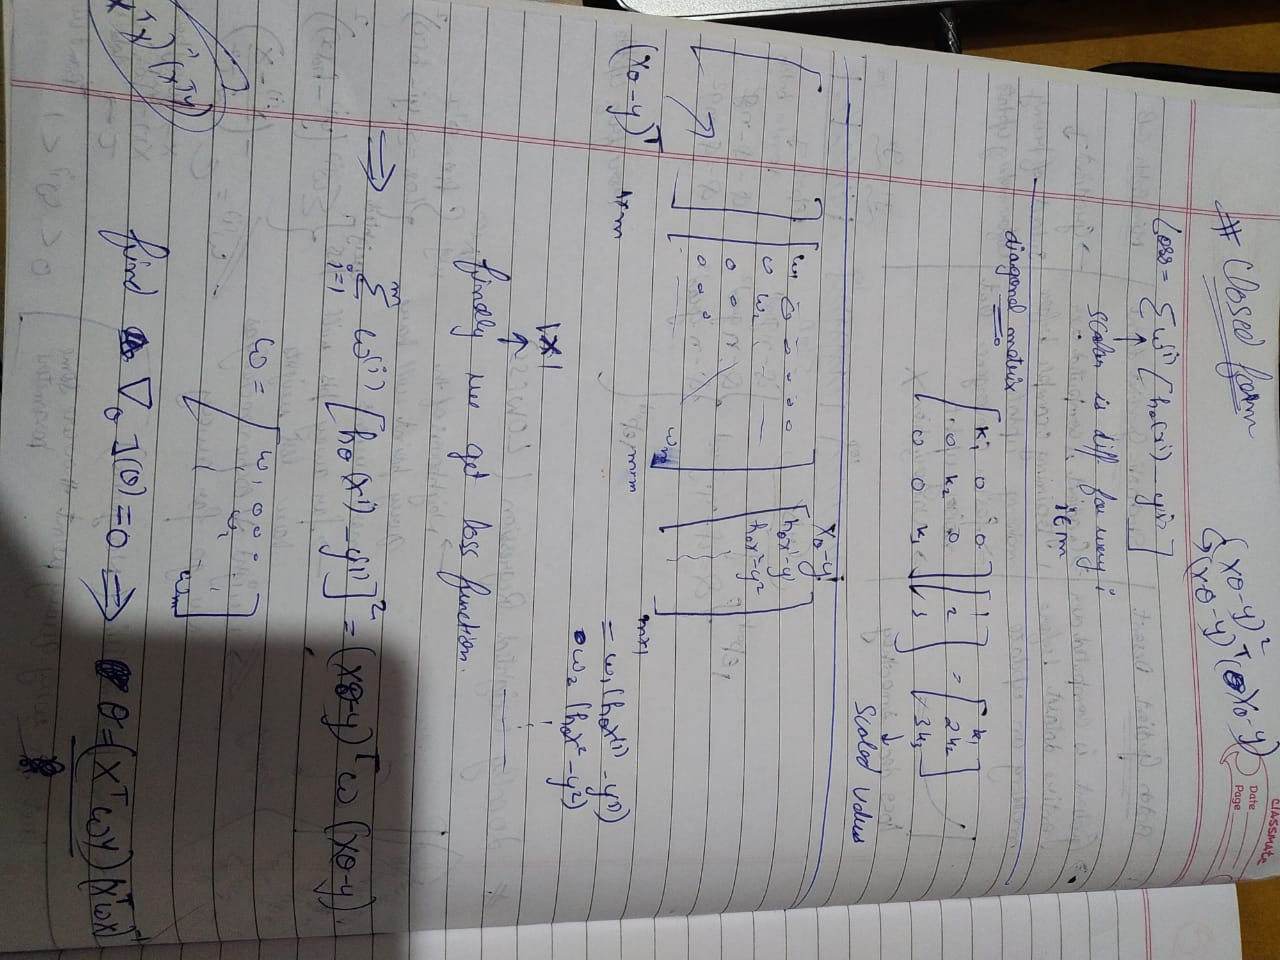

### 1. read and normalize data
### 2. generate W for every query point
### 3. no training is involved directly make pridiction using closed form solution we drived
### 4. find best value of tau(bandwidth parameter)[cross validation]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use("dark_background")

In [3]:
dfx=pd.read_csv(r"C:\Users\hp\Desktop\weightedX.csv")
dfy=pd.read_csv(r"C:\Users\hp\Desktop\weightedY.csv")

In [25]:
X=dfx.values
y=dfy.values

# normalization

u=X.mean()
std=X.std()

X=(X-u)/std

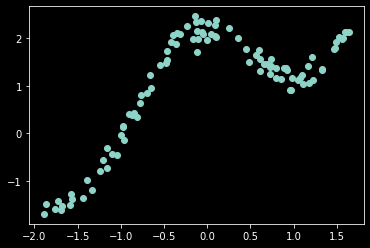

In [26]:
plt.scatter(X,y)
plt.show()

In [ ]:
# Find out W (mxm) diagonal matrix

#print(type(np.mat(np.eye(5))))

#a*b ==> a,b -->matrices -->Matrix Multicplication
#a*b ==>? a,b -->arrays --->Element Wise

In [6]:
def getW(query_point,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M):
        xi = X[i]
        x  = query_point
        W[i,i] =  np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return W

In [7]:
X = np.mat(X)
Y = np.mat(y)
M = X.shape[0]

W = getW(-1,X,100)
print(W.shape)
print(W)

(99, 99)
[[0.99997933 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999834 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997917 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994881 0.         0.        ]
 [0.         0.         0.         ... 0.         0.99987121 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975348]]


In [8]:
X = np.mat(X)
Y = np.mat(y)
M = X.shape[0]

W = getW(-1,X,1)
print(W.shape)
print(W)

(99, 99)
[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


### we can see as we increase tau problem become linear regression as w matrix become identity matrix

In [9]:
M=X.shape[0]
def predict(X,Y,query_x,tau):
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones))
    
    qx = np.mat([query_x,1])
    
    W = getW(qx,X_,tau)
    
    #theta = `(X′WX)inv * X′WY`
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    #print(theta.shape)
    pred = np.dot(qx,theta)
    return theta,pred

In [10]:
theta,pred = predict(X,Y,1.0,0.1)

In [11]:
print(theta)

[[-0.22846096]
 [ 1.38727728]]


In [12]:
pred

matrix([[1.15881632]])

In [19]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    #matplotlib will not plot without numpy array
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.title("Tau/Bandwidth Param %.2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()


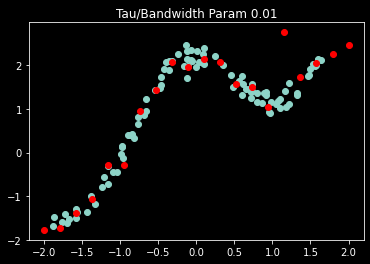

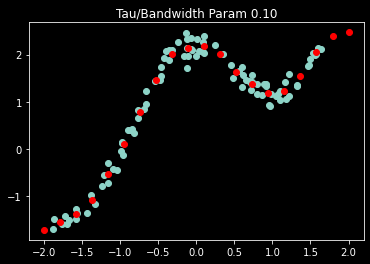

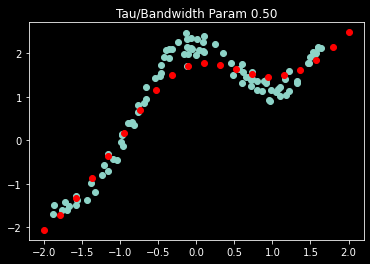

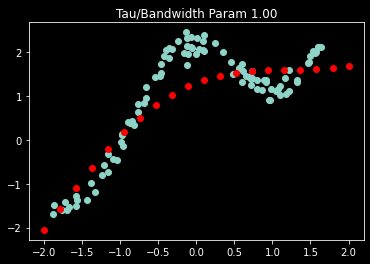

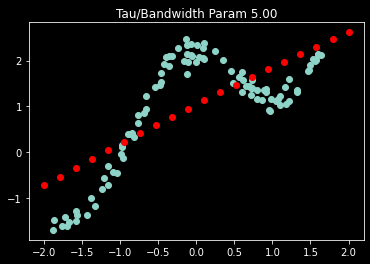

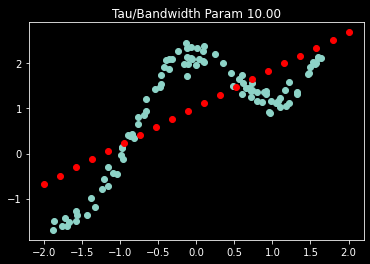

In [20]:
taus = [0.01,0.1,0.5,1,5,10]
for t in taus:
    plotPrediction(t)